In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]


#import dog.jpg
A = imread(r'C:\Users\Danii\Downloads\DATA_PYTHON\DATA\dog.jpg')
D = np.mean(A, -1); # Convert RGB to grayscale

In [5]:
# full (non-economy) SVD of data
U,Sigma,VT = np.linalg.svd(D,full_matrices=1) 

In [20]:
#r will be the rank for our truncated SVD basis. For our truncated U we will take the first r columns of U (U[:,0:r])
r = 1500


In [38]:
U[:,0:r].T@U[:,0:r]

array([[ 1.00000000e+00,  2.15269095e-16,  2.77157238e-16, ...,
         1.27935856e-17, -4.31275295e-17, -1.27156586e-17],
       [ 2.15269095e-16,  1.00000000e+00, -6.38186845e-16, ...,
         1.64595442e-17, -3.22783080e-18,  3.04152591e-17],
       [ 2.77157238e-16, -6.38186845e-16,  1.00000000e+00, ...,
         1.56938264e-16, -1.40687937e-16, -1.68356269e-17],
       ...,
       [ 1.27935856e-17,  1.64595442e-17,  1.56938264e-16, ...,
         1.00000000e+00, -6.94061867e-16, -6.22259202e-16],
       [-4.31275295e-17, -3.22783080e-18, -1.40687937e-16, ...,
        -6.94061867e-16,  1.00000000e+00, -6.32176185e-16],
       [-1.27156586e-17,  3.04152591e-17, -1.68356269e-17, ...,
        -6.22259202e-16, -6.32176185e-16,  1.00000000e+00]])

From the above it seems that $U^* U$ is indeed equal to the $rxr$ identity matrix but there seems to be some minor computational error. We will now verify if $U^* U$ is indeed equal to the $rxr$ identity matrix:

In [39]:
E = U[:,0:r].T@U[:,0:r] - np.identity(r)
val = np.linalg.norm(E, 'fro')

val

2.1482444573533806e-13

Since the Frobenius norm above is so small we conclude that $U^* U$ is indeed the $rxr$ identity matrix. On the other hand, from the computation below we see that the Fobenius norm of $UU^*- I_{2000}$ is greater than $22$ so $UU^*$ cannot be the identity matrix.

In [40]:
E2 = U[:,0:r]@U[:,0:r].T - np.identity(2000)
val2 = np.linalg.norm(E2, 'fro')

val2

22.36067977499789

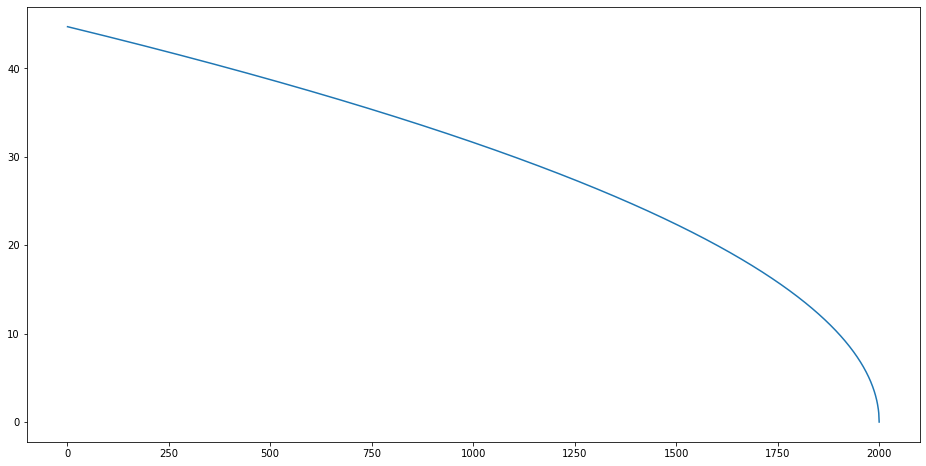

In [55]:
#compute the error of UU*-I_2000 as the rank ranges from 1 to 2000
rank = np.arange(1,2001,1)
error = []
for i in rank:
    E = U[:,:i] @ U[:,:i].T - np.identity(2000)
    error.append(np.linalg.norm(E, 'fro'))

#plot the error w.r.t rank
plt.plot(rank,error)
plt.show()